In [64]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [65]:
file_path = os.path.expanduser("~/code/meghagkrishnan/jet_engine/raw_data/train1_update.csv")

train_FD001 = pd.read_csv(file_path, sep=',')

columns = ['id', 'cycle', 'setting1', 'setting2', 'T24_Total_temperature_at_LPC_outlet',
           'T30_Total_temperature_at_HPC_outlet', 'T50_Total_temperature_at_LPT_outlet',
           'P30_Total_pressure_at_HPC_outlet', 'Nf_Physical_fan_speed',
           'Nc_Physical_core_speed', 'Ps30_Static_pressure_at_HPC_outlet',
           'phi_Ratio_of_fuel_flow_to_Ps30', 'NRf_Corrected_fan_speed',
           'NRc_Corrected_core_speed', 'BPR_Bypass_Ratio', 'htBleed_Bleed_Enthalpy',
           'W31_HPT_coolant_bleed', 'W32_LPT_coolant_bleed']

assert list(train_FD001.columns) == columns
print(train_FD001.head())

   id  cycle  setting1  setting2  T24_Total_temperature_at_LPC_outlet  \
0   1      1   -0.0007   -0.0004                               641.82   
1   1      2    0.0019   -0.0003                               642.15   
2   1      3   -0.0043    0.0003                               642.35   
3   1      4    0.0007    0.0000                               642.35   
4   1      5   -0.0019   -0.0002                               642.37   

   T30_Total_temperature_at_HPC_outlet  T50_Total_temperature_at_LPT_outlet  \
0                              1589.70                              1400.60   
1                              1591.82                              1403.14   
2                              1587.99                              1404.20   
3                              1582.79                              1401.87   
4                              1582.85                              1406.22   

   P30_Total_pressure_at_HPC_outlet  Nf_Physical_fan_speed  \
0                       

In [66]:
max_cycle = train_FD001['cycle'].max()
train_FD001['RUL'] = max_cycle - train_FD001['cycle']

print(train_FD001['RUL'].describe())

count    20631.000000
mean       253.192138
std         68.880990
min          0.000000
25%        206.000000
50%        258.000000
75%        310.000000
max        361.000000
Name: RUL, dtype: float64


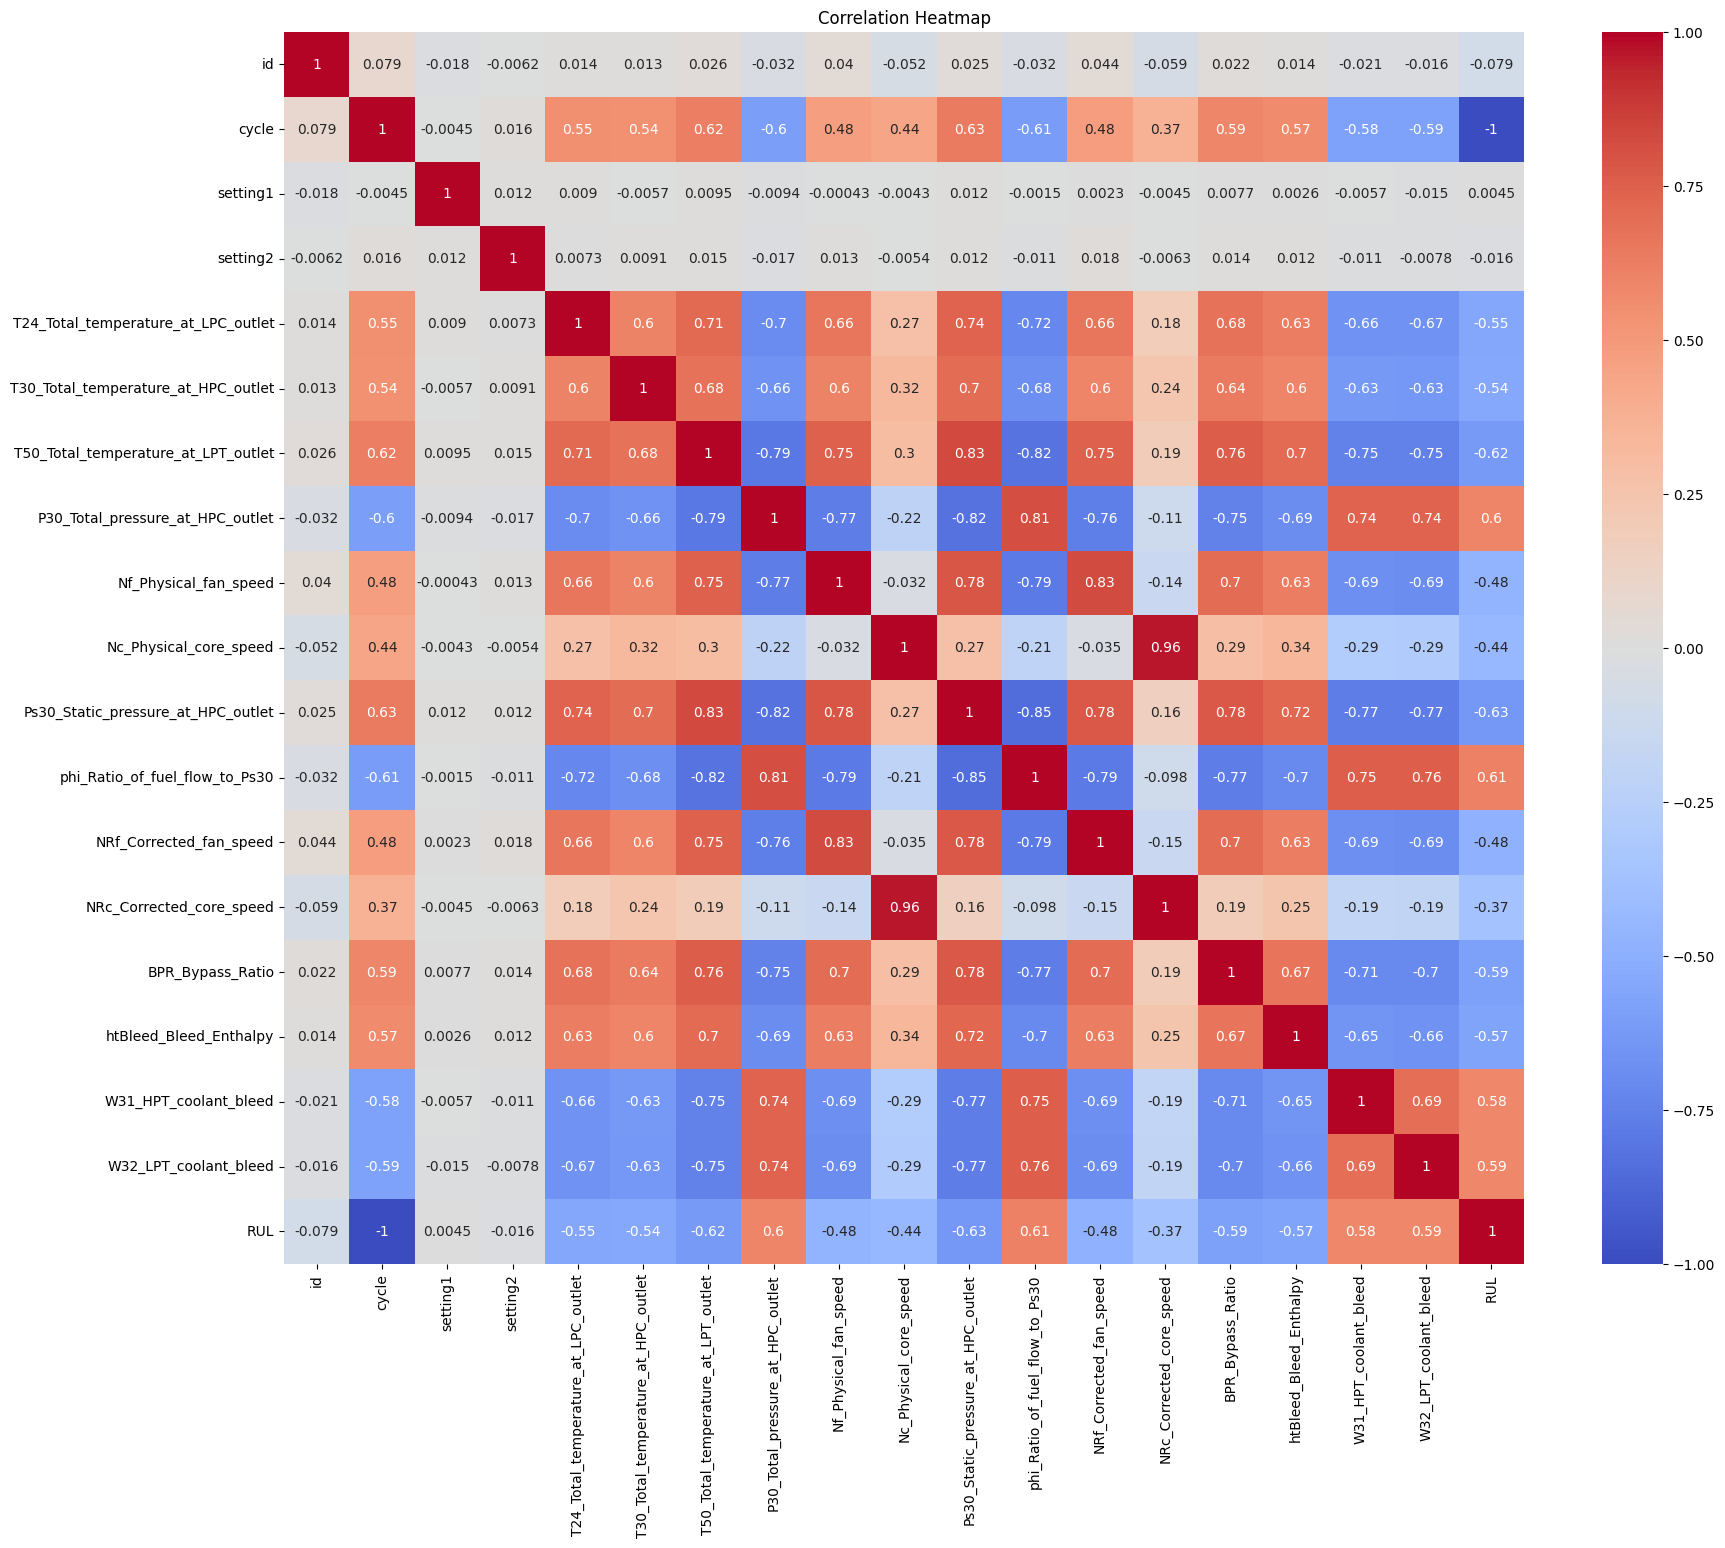

In [67]:
plt.figure(figsize=(20,16))
sns.heatmap(train_FD001.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [68]:
correlation_threshold = 0.5
selected_features = [col for col in train_FD001.columns if col not in ['id', 'RUL', 'cycle']]
selected_features = train_FD001.corr()['RUL'][abs(train_FD001.corr()['RUL']) > correlation_threshold].index.tolist()
selected_features.remove('RUL')
if 'cycle' in selected_features:
    selected_features.remove('cycle')
print("Selected features:", selected_features)

Selected features: ['T24_Total_temperature_at_LPC_outlet', 'T30_Total_temperature_at_HPC_outlet', 'T50_Total_temperature_at_LPT_outlet', 'P30_Total_pressure_at_HPC_outlet', 'Ps30_Static_pressure_at_HPC_outlet', 'phi_Ratio_of_fuel_flow_to_Ps30', 'BPR_Bypass_Ratio', 'htBleed_Bleed_Enthalpy', 'W31_HPT_coolant_bleed', 'W32_LPT_coolant_bleed']


In [69]:
scaler = StandardScaler()
train_FD001_scaled = train_FD001.copy()
train_FD001_scaled[selected_features] = scaler.fit_transform(train_FD001[selected_features])

In [70]:
train_FD001_cleaned = train_FD001_scaled.dropna()

print(train_FD001_cleaned.head())
print(train_FD001_cleaned.columns)

   id  cycle  setting1  setting2  T24_Total_temperature_at_LPC_outlet  \
0   1      1   -0.0007   -0.0004                            -1.721725   
1   1      2    0.0019   -0.0003                            -1.061780   
2   1      3   -0.0043    0.0003                            -0.661813   
3   1      4    0.0007    0.0000                            -0.661813   
4   1      5   -0.0019   -0.0002                            -0.621816   

   T30_Total_temperature_at_HPC_outlet  T50_Total_temperature_at_LPT_outlet  \
0                            -0.134255                            -0.925936   
1                             0.211528                            -0.643726   
2                            -0.413166                            -0.525953   
3                            -1.261314                            -0.784831   
4                            -1.251528                            -0.301518   

   P30_Total_pressure_at_HPC_outlet  Nf_Physical_fan_speed  \
0                       

In [71]:
test_file_path = os.path.expanduser("~/code/meghagkrishnan/jet_engine/raw_data/test_FD001_processed.csv")
test_FD001 = pd.read_csv(test_file_path)

In [72]:
print("Initial test data columns:", test_FD001.columns)
print("Initial test data shape:", test_FD001.shape)

Initial test data columns: Index(['id', 'cycle', 'setting1', 'setting2',
       'T24_Total_temperature_at_LPC_outlet',
       'T30_Total_temperature_at_HPC_outlet',
       'T50_Total_temperature_at_LPT_outlet',
       'P30_Total_pressure_at_HPC_outlet', 'Nf_Physical_fan_speed',
       'Nc_Physical_core_speed', 'Ps30_Static_pressure_at_HPC_outlet',
       'phi_Ratio_of_fuel_flow_to_Ps30', 'NRf_Corrected_fan_speed',
       'NRc_Corrected_core_speed', 'BPR_Bypass_Ratio',
       'htBleed_Bleed_Enthalpy', 'W31_HPT_coolant_bleed',
       'W32_LPT_coolant_bleed'],
      dtype='object')
Initial test data shape: (13096, 18)


In [73]:
test_FD001_scaled = test_FD001.copy()
test_FD001_scaled[selected_features] = scaler.transform(test_FD001[selected_features])

In [74]:
test_FD001_cleaned = test_FD001_scaled.dropna()

print("\nFinal test data shape:", test_FD001_cleaned.shape)
print("Final test data columns:", test_FD001_cleaned.columns)


Final test data shape: (13096, 18)
Final test data columns: Index(['id', 'cycle', 'setting1', 'setting2',
       'T24_Total_temperature_at_LPC_outlet',
       'T30_Total_temperature_at_HPC_outlet',
       'T50_Total_temperature_at_LPT_outlet',
       'P30_Total_pressure_at_HPC_outlet', 'Nf_Physical_fan_speed',
       'Nc_Physical_core_speed', 'Ps30_Static_pressure_at_HPC_outlet',
       'phi_Ratio_of_fuel_flow_to_Ps30', 'NRf_Corrected_fan_speed',
       'NRc_Corrected_core_speed', 'BPR_Bypass_Ratio',
       'htBleed_Bleed_Enthalpy', 'W31_HPT_coolant_bleed',
       'W32_LPT_coolant_bleed'],
      dtype='object')


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
X = train_FD001_cleaned.drop(['RUL', 'cycle'], axis=1)
y = train_FD001_cleaned['RUL']

In [77]:
X_train = X[X['id'] <= 80]
X_test = X[X['id'] > 80]
y_train = y[:len(X_train)]
y_test = y[len(X_train):]

print (X_train, X_test, y_train, y_test)

       id  setting1  setting2  T24_Total_temperature_at_LPC_outlet  \
0       1   -0.0007   -0.0004                            -1.721725   
1       1    0.0019   -0.0003                            -1.061780   
2       1   -0.0043    0.0003                            -0.661813   
3       1    0.0007    0.0000                            -0.661813   
4       1   -0.0019   -0.0002                            -0.621816   
...    ..       ...       ...                                  ...   
16133  80    0.0042    0.0002                             2.637916   
16134  80   -0.0014    0.0004                             2.257947   
16135  80    0.0018    0.0000                             1.618000   
16136  80   -0.0024    0.0002                             2.297944   
16137  80    0.0015    0.0000                             2.397936   

       T30_Total_temperature_at_HPC_outlet  \
0                                -0.134255   
1                                 0.211528   
2                    

In [78]:
X_train = X_train.drop('id', axis=1)
X_test = X_test.drop('id', axis=1)

In [79]:
numeric_features = X_train.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ])
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['setting1', 'setting2',
                                                   'T24_Total_temperature_at_LPC_outlet',
                                                   'T30_Total_temperature_at_HPC_outlet',
                                                   'T50_Total_temperature_at_LPT_outlet',
                                                   'P30_Total_pressure_at_HPC_outlet',
                                                   'Nf_Physical_fan_speed',
                                                   'Nc_Physical_core_speed',
                                                   'Ps30_Static_pressure_at_HPC_outlet',
                                                   'phi_Ratio_of_fuel_flow_to_Ps30',
                                                   'NRf_Corrected_fan_speed',
                                                   'NRc_Corrected_core_speed',
                                                   'BPR_Bypass_Ratio',
                                                   'htBleed_Bleed_Enthalpy',
                                                   'W31_HPT_coolant_bleed',
                                                   'W32_LPT_coolant_bleed'])])),
                ('regressor', LinearRegression())])

In [80]:
y_test_pred = pipeline.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
print("Test R2 Score:", test_r2)

Test R2 Score: 0.47717042203391236


In [81]:
X_test = test_FD001_cleaned.drop(['cycle'], axis=1)
X_test = X_test[X_train.columns]

y_test_pred = pipeline.predict(X_test)

results_df = pd.DataFrame({
    'id': test_FD001_cleaned['id'],  
    'cycle': test_FD001_cleaned['cycle'],
    'predicted_RUL': y_test_pred
})

final_predictions = results_df.groupby('id').last().reset_index()

print("\nFinal predictions:")
print(final_predictions.head())


Final predictions:
   id  cycle  predicted_RUL
0   1     31     303.954676
1   2     49     275.320987
2   3    126     240.417471
3   4    106     251.258736
4   5     98     265.200978


Model Random Forest Regressor

In [18]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
columns_to_drop = ['RUL', 'cycle']
if 'id' in train_FD001_cleaned.columns:
    columns_to_drop.append('id')
X_train = train_FD001_cleaned.drop(columns_to_drop, axis=1)
y_train = train_FD001_cleaned['RUL']

columns_to_drop = ['cycle']
if 'id' in test_FD001_cleaned.columns:
    columns_to_drop.append('id')
X_test = test_FD001_cleaned.drop(columns_to_drop, axis=1)

X_sample, _, y_sample, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

param_dist = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [10, 20, None],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

In [65]:
random_search = RandomizedSearchCV(rf_pipeline, param_distributions=param_dist, 
                                   n_iter=10, cv=3, scoring='neg_mean_squared_error', 
                                   n_jobs=-1, random_state=42)
random_search.fit(X_sample, y_sample)

print("Best parameters:", random_search.best_params_)

Best parameters: {'rf__n_estimators': 200, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 2, 'rf__max_depth': 10}


In [66]:
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)

if 'id' in test_FD001_cleaned.columns:
    results_df = pd.DataFrame({
        'id': test_FD001_cleaned['id'],
        'predicted_RUL': y_pred
    })
else:
    results_df = pd.DataFrame({
        'predicted_RUL': y_pred
    })

if 'id' in results_df.columns:
    final_predictions = results_df.groupby('id').last().reset_index()
else:
    final_predictions = results_df

print("\nFinal predictions:")
print(final_predictions.head())


Final predictions:
   id  predicted_RUL
0   1     298.900359
1   2     312.172999
2   3     231.386189
3   4     274.616819
4   5     272.295590


In [67]:
final_predictions.to_csv('random_forest_predictions.csv', index=False)

In [69]:
cv_mse_scores = -cross_val_score(best_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=3, scoring='r2')

print("Cross-validation MSE scores:", cv_mse_scores)
print("\nCross-validation R² scores:", cv_r2_scores)

Cross-validation MSE scores: [1554.42412169 1663.35583876 2994.64239978]

Cross-validation R² scores: [0.61445777 0.60524318 0.48782041]


LSTM

In [82]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [83]:
# creat feature list
sensor_cols = ['s' + str(i) for i in range(1,22)]
sequence_cols = ['setting1', 'setting2', 'cycle']
sequence_cols.extend(sensor_cols)

In [84]:
print(train_FD001_cleaned.columns)

Index(['id', 'cycle', 'setting1', 'setting2',
       'T24_Total_temperature_at_LPC_outlet',
       'T30_Total_temperature_at_HPC_outlet',
       'T50_Total_temperature_at_LPT_outlet',
       'P30_Total_pressure_at_HPC_outlet', 'Nf_Physical_fan_speed',
       'Nc_Physical_core_speed', 'Ps30_Static_pressure_at_HPC_outlet',
       'phi_Ratio_of_fuel_flow_to_Ps30', 'NRf_Corrected_fan_speed',
       'NRc_Corrected_core_speed', 'BPR_Bypass_Ratio',
       'htBleed_Bleed_Enthalpy', 'W31_HPT_coolant_bleed',
       'W32_LPT_coolant_bleed', 'RUL'],
      dtype='object')


In [85]:
# Convert the raw data into a sequence format that can be used by the LSTM model
# LSTM requires time series data

def prepare_data(df, sequence_length):
    features = df.drop(['id', 'cycle', 'RUL'], axis=1).values
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    X, y = [], []
    for i in range(len(df['id'].unique())):
        engine_data = features_scaled[df['id'] == i+1]
        for j in range(len(engine_data) - sequence_length):
            X.append(engine_data[j:j+sequence_length])
            y.append(df[df['id'] == i+1]['RUL'].values[j+sequence_length])
    
    return np.array(X), np.array(y), scaler

In [86]:
# The raw data is converted into a format that can be used by the model and normalized.
sequence_length = 50  
X_train, y_train, scaler = prepare_data(train_FD001_cleaned, sequence_length)

In [87]:
# Define and compile the LSTM model.
# Create a model structure that can process time series data and predict RUL.
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

/Users/zenajo/.pyenv/versions/3.10.6/envs/jet_engine/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [88]:
# Through multiple iterations, the model learns the patterns in the data in order to make accurate RUL predictions.
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 65821.1562 - val_loss: 55328.0938
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 55006.4570 - val_loss: 49315.6133
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 67271.7969 - val_loss: 48635.1328
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 54475.0742 - val_loss: 48282.8320
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 53431.1250 - val_loss: 47820.7344
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 48412.5508 - val_loss: 35656.6133
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 41776.9766 - val_loss: 30489.9883
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 32639.6582 - val_loss: 21935.1660
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 25640.4355 - val_loss: 16306.7734
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 19025.1504 - val_loss: 11281.2539
Epoch 11/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss

In [89]:
# Apply the same data processing to the test data and use the model to make predictions.

def predict_RUL(model, data, scaler, sequence_length):
    features = data.drop(['id', 'cycle'], axis=1).values
    features_scaled = scaler.transform(features)
    
    predictions = []
    for i in range(len(data['id'].unique())):
        engine_data = features_scaled[data['id'] == i+1]
        if len(engine_data) >= sequence_length:
            sequence = engine_data[-sequence_length:]
            prediction = model.predict(np.array([sequence]))
            predictions.append(prediction[0][0])
        else:
            predictions.append(None) 
    
    return predictions

In [90]:
# Apply the model to new data, generate final RUL predictions, and present the results in an easy-to-read format

test_predictions = predict_RUL(model, test_FD001_cleaned, scaler, sequence_length)
results_df = pd.DataFrame({
    'id': test_FD001_cleaned['id'].unique(),
    'predicted_RUL': test_predictions
})
print("\nFinal predictions:")
print(results_df.head())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

SVR

In [91]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [92]:
X = train_FD001_cleaned.drop(['RUL'], axis=1)
y = train_FD001_cleaned['RUL']

In [93]:
X_train = X[X['id'] <= 80].drop('id', axis=1)
X_test = X[X['id'] > 80].drop('id', axis=1)
y_train = y[:len(X_train)]
y_test = y[len(X_train):]

In [94]:
print("shape of train data:", X_train.shape, y_train.shape)
print("shape of test data:", X_test.shape, y_test.shape)

shape of train data: (16138, 17) (16138,)
shape of test data: (4493, 17) (4493,)


In [95]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
# create and training SVR
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

# prediction on test data
y_test_pred = svr.predict(X_test_scaled)

# R2 
r2 = r2_score(y_test, y_test_pred)

print(f"R2_score: {r2}")

R2_score: 0.999176515742544


In [97]:
# create result dataframe
results_df = pd.DataFrame({
    'id': X[X['id'] > 80]['id'],
    'actual_RUL': y_test,
    'predicted_RUL': y_test_pred
})

print("\nfinal pred result:")
print(results_df.head())


final pred result:
       id  actual_RUL  predicted_RUL
16138  81         361     359.660514
16139  81         360     360.117296
16140  81         359     357.276045
16141  81         358     358.142584
16142  81         357     355.787788


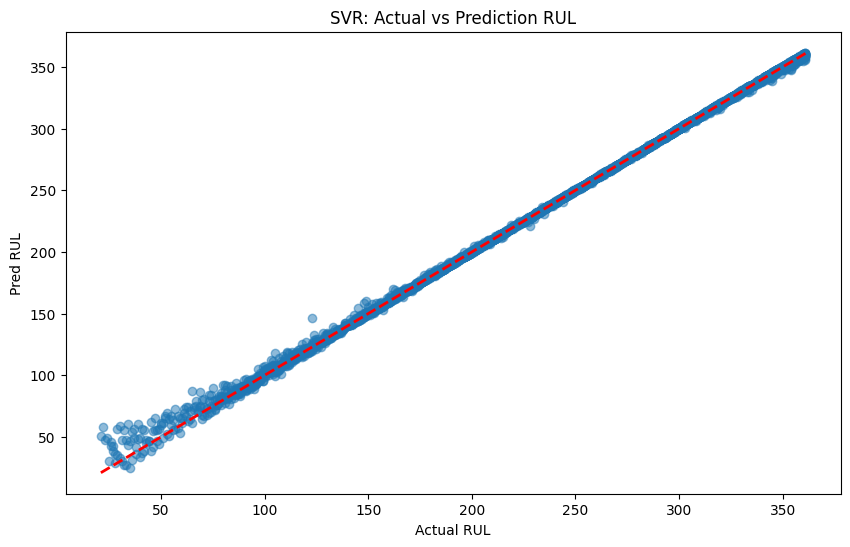

In [98]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual RUL')
plt.ylabel('Pred RUL')
plt.title('SVR: Actual vs Prediction RUL')
plt.show()